# Анализ вакансий DS и DA

**Описание проекта:** <br>

Исследование различий между вакансиями Data Scientist и Data Analyst.

**Цель исследования:** <br>

Показать чем различаются вакансии Data Scientist и Data Analyst.

**План работы:**

1) Загрузим данные и подготовим их к анализу.
2) Проведем исследовательский анализ данных.
3) Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
4) Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
5) Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6) Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
7) Формулирование выводов и рекомендаций.
8) Создание презентации.

**Описание данных:**

В нашем распоряжении два датасета о вакансиях представленных на сайте HH.ru c 2024-02-29 по 2024-05-07. Данные получены из API HH.ru.

`da.csv` - вакансии аналитиков данных
`ds.csv` - вакансии датасаентистов

Столбцы в двух таблицах идентичны:

- `id` -  уникальный номер вакансии
- `name` - название вакансии
- `published_at` - дата публикации вакансии(Для каждой вакансии мы сохраням только первую дату публикации)
- `alternate_url` - ссылка на вакансию
- `type` - тип вакансии
- `employer` - работодатель
- `department` - подразделение работодателя
- `area` - регион вакансии
- `experience` - требуемый опыт работы
- `key_skills` - требуемые скиллы
- `schedule` - график работы
- `employment` - тип занятости
- `description` - подробное описание вакансии
- `salary_from` - зарплата от
- `salary_to` -  зарплата до

---

## Загрузим данные и подготовим их к анализу

---

In [38]:
import pandas as pd
from pymystem3 import Mystem
import numpy as np
from tqdm.notebook import tqdm
import re
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

---

Посмотрим как выглядят данные

In [2]:
# приведем published_at сразу в формат даты
da = pd.read_csv('data/da.csv', parse_dates=['published_at'])
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to
292,95130885,Data Analyst (remote),2024-04-16 14:17:14,https://hh.ru/vacancy/95130885,Открытая,ФЛАУВАУ,NaN,Москва,Junior+ (1-3 years),[],Удаленная работа,Полная занятость,"flowwow - маркетплейс, где продают свои товары...",NaN,NaN
1186,98601996,Аналитик данных (Junior),2024-05-08 11:03:41,https://hh.ru/vacancy/98601996,Открытая,Московская Биржа,NaN,Москва,Нет опыта,"['SQL', 'Анализ данных']",Полный день,Полная занятость,В 2022 году Московской бирже исполнилось 30 ле...,NaN,NaN
291,95109897,Аналитик данных,2024-04-09 08:58:17,https://hh.ru/vacancy/95109897,Открытая,Kundalik,NaN,Ташкент,От 1 года до 3 лет,"['SQL', 'Математическая статистика', 'Сбор и а...",Полный день,Полная занятость,Мы Вам доверим: • Получение данных из первичны...,NaN,NaN
428,96099472,Senior Data Analyst (клиентская аналитика),2024-05-02 16:29:01,https://hh.ru/vacancy/96099472,Открытая,"МАГНИТ, Розничная сеть",NaN,Москва,От 3 до 6 лет,"['SQL', 'Data Analyst', 'A/B тесты']",Удаленная работа,Полная занятость,Мы находимся в поисках Senior Data Analyst в н...,NaN,NaN
680,97141551,Руководитель направления по аналитике и анализ...,2024-04-16 16:51:41,https://hh.ru/vacancy/97141551,Открытая,БАНК УРАЛСИБ,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Чем предстоит заниматься работой с хранилище...,NaN,NaN


In [3]:
# приведем published_at сразу в формат даты
ds = pd.read_csv('data/ds.csv', parse_dates=['published_at'])
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to
222,94715440,"Data scientist (Risk), remote",2024-04-12 10:22:53,https://hh.ru/vacancy/94715440,Открытая,Мокка,NaN,Москва,От 3 до 6 лет,"['Python', 'SQL']",Полный день,Полная занятость,Мокка – это самый популярный в России и Восточ...,200000.0,350000.0
625,97661959,Senior Data Scientist в команду антифрода,2024-04-22 22:39:44,https://hh.ru/vacancy/97661959,Открытая,Газпромбанк,Газпромбанк,Новосибирск,От 3 до 6 лет,[],Полный день,Полная занятость,ЧЕМ БУДЕШЬ ЗАНИМАТЬСЯ? Разрабатывать и внедря...,NaN,NaN
621,97655936,Стажер Data science,2024-04-22 19:34:53,https://hh.ru/vacancy/97655936,Открытая,Банк Русский Стандарт,NaN,Москва,Нет опыта,"['Анализ данных', 'Big Data']",Гибкий график,Стажировка,ЗАДАЧИ НА ПЕРИОД СТАЖИРОВКИ/ПРАКТИКИ: Подгот...,NaN,NaN
401,95805024,Аналитик данных в отдел планирования и прогноз...,2024-04-23 14:47:58,https://hh.ru/vacancy/95805024,Открытая,"Бристоль, сеть магазинов",NaN,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,"Обязанности: Прогнозирование спроса, построен...",NaN,218400.0
586,97352768,Data Scientist,2024-04-18 17:34:00,https://hh.ru/vacancy/97352768,Открытая,СБЕР,Сбер для экспертов,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Блок «Управление благосостоянием» объединяет в...,NaN,NaN


---

Добавим флаговую переменную(которая будет принимать два значения "da" или "ds") и объеденим данные, чтобы на этапе обработке было удобнее с ними работать

In [4]:
# Создаем переменные
da['name_type'] = 'da'
ds['name_type'] = 'ds'

# объеденяем таблицы
vacancies = pd.concat((da, ds))
start_data_size = vacancies.shape[0]

---

Посмотрим общую информацию о датасете

In [5]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 0 to 800
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2010 non-null   int64         
 1   name           2010 non-null   object        
 2   published_at   2010 non-null   datetime64[ns]
 3   alternate_url  2010 non-null   object        
 4   type           2010 non-null   object        
 5   employer       2010 non-null   object        
 6   department     621 non-null    object        
 7   area           2010 non-null   object        
 8   experience     2010 non-null   object        
 9   key_skills     2010 non-null   object        
 10  schedule       2010 non-null   object        
 11  employment     2010 non-null   object        
 12  description    2010 non-null   object        
 13  salary_from    290 non-null    float64       
 14  salary_to      198 non-null    float64       
 15  name_type      2010 non-nul

Видно что работодатели зачастую не вносят информацию о зарплате.

---

Мы хотим сравнить две когорты аналитиков и датасаентистов. В наших данных есть смежные вакансии - Аналитик данных/Data Scientist, так как непонятно к какой когорте их отнести, давайте посмотрим сколько этих данных в нашем датасете и удалим их.

In [6]:
grid = vacancies.name.str.lower().str.contains(r'data scien') \
    & (vacancies.name.str.lower().str.contains(r'analyst') \
    | vacancies.name.str.lower().str.contains(r'аналитик'))
vacancies[grid].sort_values(by='id')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,name_type
56,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,NaN,NaN,da
63,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,NaN,NaN,ds
64,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,NaN,NaN,ds
57,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,NaN,NaN,da
70,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12 12:42:01,https://hh.ru/vacancy/92068025,Открытая,Федеральное государственное автономное учрежде...,NaN,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",Полный день,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,100000.0,NaN,ds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,98551181,Аналитик данных / Data Scientist (middle+),2024-05-07 14:36:58,https://hh.ru/vacancy/98551181,Открытая,"СИБУР, Группа компаний",Сибур,Москва,От 3 до 6 лет,"['Python', 'SQL', 'Математическая статистика']",Полный день,Полная занятость,СИБУР Диджитал - это цифровой кластер в состав...,NaN,NaN,da
774,98573757,Аналитик данных/Data Scientist,2024-05-07 20:09:28,https://hh.ru/vacancy/98573757,Открытая,Консорциум Кодекс,NaN,Санкт-Петербург,От 1 года до 3 лет,"['Machine Learning', 'Data Science', 'SQL', 'P...",Полный день,Полная занятость,"Основные задачи: Разработка, тестирование и в...",NaN,NaN,ds
1173,98573757,Аналитик данных/Data Scientist,2024-05-07 20:09:28,https://hh.ru/vacancy/98573757,Открытая,Консорциум Кодекс,NaN,Санкт-Петербург,От 1 года до 3 лет,"['Machine Learning', 'Data Science', 'SQL', 'P...",Полный день,Полная занятость,"Основные задачи: Разработка, тестирование и в...",NaN,NaN,da
1183,98592181,Аналитик данных/Junior DATA SCIENTIST,2024-05-08 09:12:01,https://hh.ru/vacancy/98592181,Открытая,БиАйЭй-Технолоджиз,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Активно формируем новую команду для нашего кру...,NaN,NaN,da


У нас 115 таких наблюдения, давайте их удалим.

In [7]:
vacancies = vacancies[~grid].sort_values(by='id')

In [8]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.72% данных


---

Создадим новую переменную `published_date`

In [9]:
vacancies['published_date'] = vacancies.published_at.dt.date

---

Посмотрим наличие дубликатов

In [10]:
n_dupl = vacancies.duplicated(
    subset='id'
).sum()
print(f'Количество дубликатов - {n_dupl}')

Количество дубликатов - 1


Посмотрим на дубликаты

In [11]:
vacancies[
    vacancies.duplicated(
        subset='id',
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,name_type,published_date
434,96061431,Data Scientist,2024-04-27 10:07:00,https://hh.ru/vacancy/96061431,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,корпоративно-инвестиционный блок отвечает за р...,NaN,NaN,ds,2024-04-27
420,96061431,Аналитик данных (Голос клиента),2024-04-27 10:07:00,https://hh.ru/vacancy/96061431,Открытая,СБЕР,Сбер для экспертов,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,Корпоративно-инвестиционный блок отвечает за р...,NaN,NaN,da,2024-04-27


Это одна и та же вакансия, судя по всему она сначала называлась Аналитик данных, а потом ее переименовали в Data Scientist, cтоит удалить эти наблюдения потому что не понятно к какой когорте их отнести.

In [12]:
vacancies.drop_duplicates(subset='id', keep=False, inplace=True)

In [13]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.82% данных


Проверим есть ли у нас одинаковые вакансии, но с разным id

In [14]:
vacancies[
    vacancies.duplicated(
        subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,name_type,published_date
945,97929624,Аналитик данных,2024-04-25 17:24:21,https://hh.ru/vacancy/97929624,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,150000.0,NaN,da,2024-04-25
946,97929739,Аналитик данных,2024-04-25 17:27:28,https://hh.ru/vacancy/97929739,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,NaN,NaN,da,2024-04-25


Удалим дубликат

In [15]:
vacancies.drop_duplicates(
    subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
    keep=False, inplace=True
)

In [16]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.92% данных


---

Посмотрим какие названия вакансий у нас в датасете

In [17]:
vacancies.name.value_counts()[:10]

name
Аналитик данных            198
Data Scientist             114
Data Analyst                78
Senior Data Scientist       24
Junior Data Scientist       19
Data scientist              19
Ведущий аналитик данных     17
Middle Data Scientist       15
Senior Data Analyst         13
Data analyst                12
Name: count, dtype: int64

In [18]:
vacancies.name.value_counts()[-10:]

name
Data Analyst (Customer Communication)                              1
Junior Data Scientist в SberData                                   1
Middle Data Scientist в Департамент "Занять и сберегать"           1
Data Analyst в Департамент данных и рекомендательных систем В2С    1
Middle/Senior Data Scientist в Блок B2C                            1
Data Scientist (LLM/ NlP) в Блок B2C                               1
Data analyst (Middle)                                              1
Системный аналитик данных                                          1
Team Lead Data Scientist в команду SberCampaigning                 1
Product Data Analyst                                               1
Name: count, dtype: int64

Все просмотреть нет возможности, но тут вроде порядок.

---

Посмотрим минимальные и максимальные даты

In [19]:
print(f'Минимальная дата - {vacancies.published_at.min().strftime("%Y-%m-%d %X")}')
print(f'Максимальная дата - {vacancies.published_at.max().strftime("%Y-%m-%d %X")}')

Минимальная дата - 2024-02-29 15:01:35
Максимальная дата - 2024-05-08 21:59:12


---

Посмотрим какие регионы присутствуют в нашем датасете

In [20]:
vacancies[vacancies.name_type == 'da'].area.value_counts()[:25]

area
Москва             778
Санкт-Петербург     95
Ташкент             26
Екатеринбург        25
Алматы              23
Нижний Новгород     17
Минск               16
Новосибирск         15
Владивосток         13
Казань              12
Краснодар           12
Сербия              10
Астана               9
Ростов-на-Дону       7
Тбилиси              6
Бишкек               5
Красноярск           4
Владимир             4
Самара               4
Воронеж              4
Саратов              4
Челябинск            4
Тюмень               4
Пермь                3
Ижевск               3
Name: count, dtype: int64

---

Посмотрим значения в переменной `experience`

In [21]:
vacancies.experience.value_counts()

experience
От 1 года до 3 лет       785
От 3 до 6 лет            534
Junior+ (1-3 years)      207
Middle (3-6 years)       195
Нет опыта                115
Более 6 лет               25
Junior (no experince)     18
Senior (6+ years)         12
Name: count, dtype: int64

Привидем значения к общему виду

In [22]:
def calc_experience(value):
    if value[0] < 'А':
        return value
    expirience = re.findall(r'\d', value)
    if not expirience:
        return 'Junior (no experince)'
    if expirience[0] == '6':
        return 'Senior (6+ years)'
    if expirience[0] == '1':
        return 'Junior+ (1-3 years)'
    if expirience[0] == '3':
        return 'Middle (3-6 years)'   

In [23]:
vacancies.experience = vacancies.experience.map(calc_experience)

---

Посмотрим значения графика работы

In [24]:
vacancies.schedule.value_counts()

schedule
Полный день         1487
Удаленная работа     329
Гибкий график         64
Сменный график        10
Вахтовый метод         1
Name: count, dtype: int64

Интересно посмотреть на вакансию с вахтовым методом:)

In [25]:
vacancies[vacancies.schedule == 'Вахтовый метод']

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,name_type,published_date
695,97189840,Аналитик по работе с базами данных (MS Excel),2024-04-17 09:37:54,https://hh.ru/vacancy/97189840,Открытая,РХИ,NaN,Свободный,Junior+ (1-3 years),"['MS Excel', 'Управленческая отчетность', 'Раб...",Вахтовый метод,Полная занятость,"Уважаемые соискатели, Мы в поиске сотрудника н...",NaN,NaN,da,2024-04-17


---

Посмотрим какие значения принимает переменная `employment`

In [26]:
vacancies.employment.value_counts()

employment
Полная занятость       1841
Стажировка               27
Проектная работа         16
Частичная занятость       7
Name: count, dtype: int64

---

In [27]:
vacancies.reset_index(drop=True, inplace=True)

### Создадим необходимые переменные

Проведем лемматизацию описания и результат сохраним в новый столбец `description_lemmatized`

In [28]:
def lemmatize_corpus(description: pd.Series) -> pd.Series:
    texts = ' br '.join(description.to_list())
    
    print('Запуск лематизации')
    stem = Mystem()
    text_lemm = stem.lemmatize(texts)
    
    data = []
    temp = []
    for word in tqdm(text_lemm):
        if word == 'br':
            data.append(' '.join([word for word in temp if word.isalpha()]))
            temp = []
        else:
            temp.append(word)
    data.append(' '.join([word for word in temp if word.isalpha()]))
    data = pd.Series(data, name='description_lemmatized')
    assert description.shape[0] == data.shape[0]
    return data

In [29]:
vacancies['description_lemmatized'] = lemmatize_corpus(vacancies.description)

Запуск лематизации


  0%|          | 0/984673 [00:00<?, ?it/s]

---

Создадим переменную `salary_cat`, которая будет содержать категорию заработной платы.

In [30]:
def calc_salary_bin(row):
    if row.isna()['salary_to'] and row.isna()['salary_from']:
        return 'ЗП не указана'
    if not row.isna()['salary_to']:
        if row['salary_to'] > 3e5:
            return 'Больше 300 тысяч'
        if row['salary_to'] > 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_to'] > 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'
    if not row.isna()['salary_from']:
        if row['salary_from'] >= 3e5:
            return 'Больше 300 тысяч'
        if row['salary_from'] >= 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_from'] >= 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'

In [31]:
vacancies['salary_bin'] = vacancies.apply(calc_salary_bin, axis=1)

---

## Исследовательский анализ данных

---

Общее количество вакансий - 1891


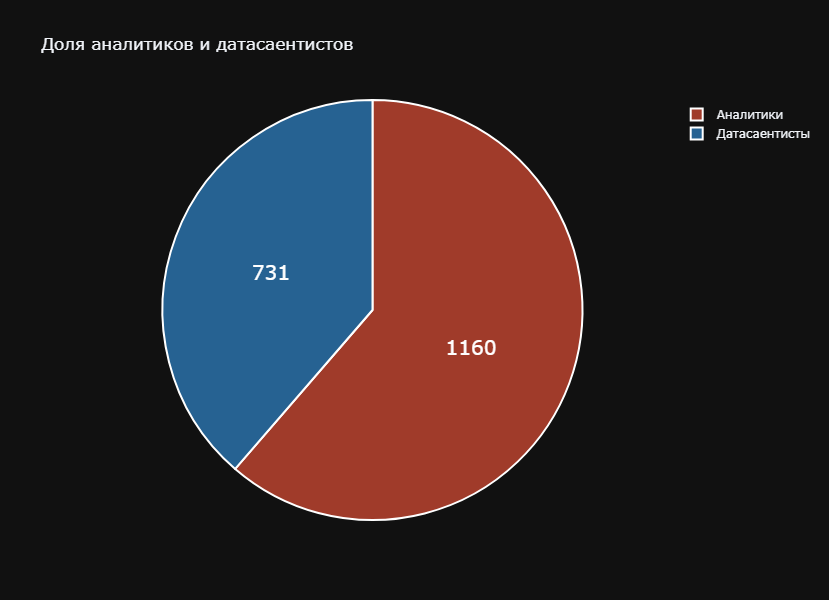

In [244]:
df = vacancies.name_type.value_counts().reset_index()
print(f'Общее количество вакансий - {vacancies.shape[0]}')
colors = ['#A03B2A', '#266292']
fig = go.Figure(data=[go.Pie(labels=['Аналитики','Датасаентисты'],
                             values=df['count'])])
fig.update_layout(
        height=600, width=600, 
        title_text='Доля аналитиков и датасаентистов', 
        showlegend=True,
        template="plotly_dark",       
    )
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

Вакансий аналитиков в два раза больше вакансий датаса

---

Посмотрим самые частовстречаемые названия вакансий для аналитиков и датасаентистов

In [206]:
def plot_discrete(name_type: str, 
                  top_n: int,
                  feature,
                  *,
                  rus_feature,
                  title_text, 
                  data=vacancies, 
                  color='#FF563A',
                  width=800,
                  height=800,
                  top=True
                 ) -> None:
    top_name = (
        data[data.name_type == name_type]
        [feature].value_counts()[:top_n]
        .reset_index()
        .sort_values(by='count')
        .rename(columns={'count': 'Количество вакансий', feature: rus_feature})
    )
    
    fig = px.bar(top_name, 'Количество вакансий', rus_feature, orientation='h')
    
    fig.update_traces(marker_color=color, marker_line_color='#FFFFFF',
                      marker_line_width=1.5, opacity=0.6)
    
    fig.update_layout(
        height=height, width=width, 
        title_text=title_text, 
        showlegend=False,
        template="plotly_dark",       
    )
    fig.show()

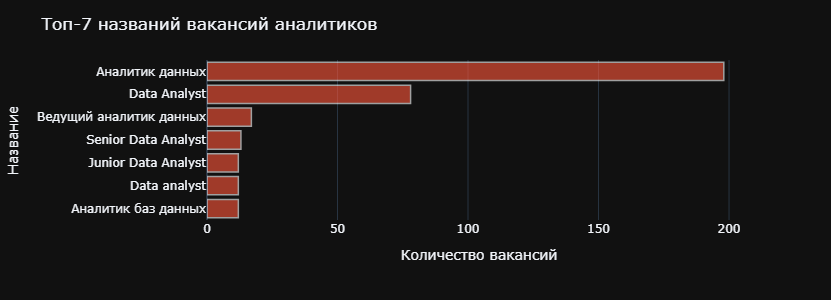

In [207]:
plot_discrete(
    'da', 7, 'name', 
    rus_feature='Название', 
    title_text='Топ-7 названий вакансий аналитиков',
    height=300
)

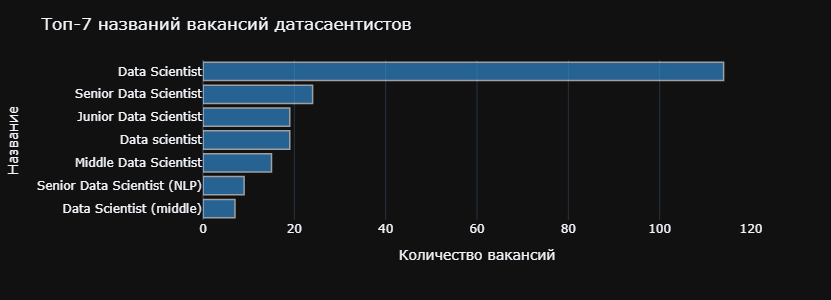

In [208]:
plot_discrete(
    'ds', 7, 'name', 
    rus_feature='Название', 
    title_text='Топ-7 названий вакансий датасаентистов',
    height=300,
    color='#3498E8'
)

Как видно из данных, наиболее востребованными на рынке труда являются позиции "Аналитик данных", "Data Analyst" и "Data Scientist". Это говорит о том, что соискателям, вероятно, не следует усложнять название своей специализации при поиске работы. Простота и понятность названия профессии могут оказаться ключевыми в успешном трудоустройстве.

---

Посмотрим на количество опубликованных вакансий в динамике

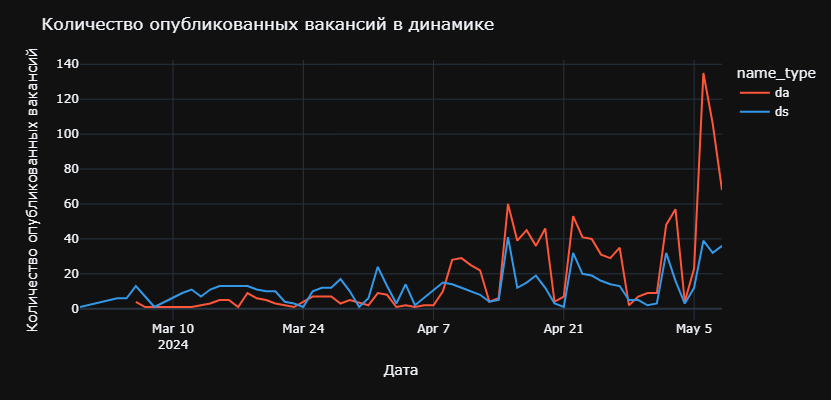

In [209]:
df = (
    vacancies.groupby(['name_type', 'published_date'])
    .name.count()
    .reset_index()
    .rename(columns={'name': 'Количество опубликованных вакансий',
                     'published_date': 'Дата'})
)
fig = px.line(df, x='Дата', 
              y='Количество опубликованных вакансий', 
              color='name_type'
             )
fig.data[0].line.color = '#FF563A'
fig.data[1].line.color = '#3498E8'
fig.update_layout(
        height=400, width=800, 
        title_text=f"Количество опубликованных вакансий в динамике",
        showlegend=True,
        template="plotly_dark",
        
    )
fig.show()

Анализируя график мы можем увидеть, что объем вакансий, опубликованных в период с 29 февраля по 8 мая 2024 года, показывает значительное увеличение в апреле по сравнению с мартом. Это может свидетельствовать о повышенной активности на рынке труда в апрельский период, что, в свою очередь, открывает больше возможностей для соискателей и указывает на рост потребности компаний в новых сотрудниках. 

---

Посмотрим на работодателей которые опубликовали больше всего вакансий

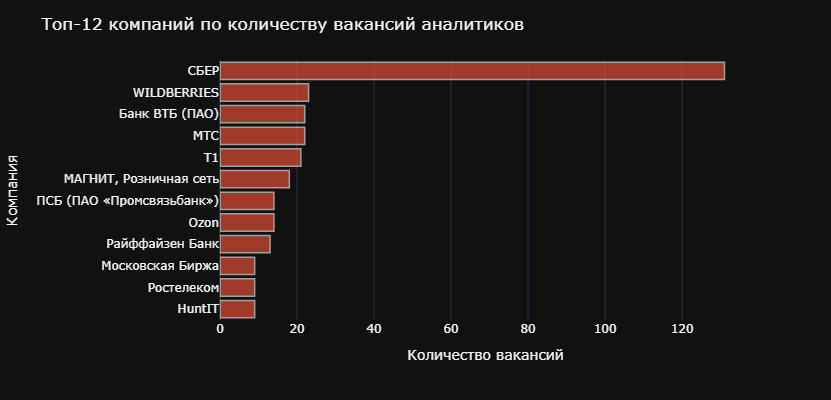

In [210]:
plot_discrete(
    'da', 12, 'employer',
    rus_feature='Компания',
    title_text='Топ-12 компаний по количеству вакансий аналитиков',
    height=400
)

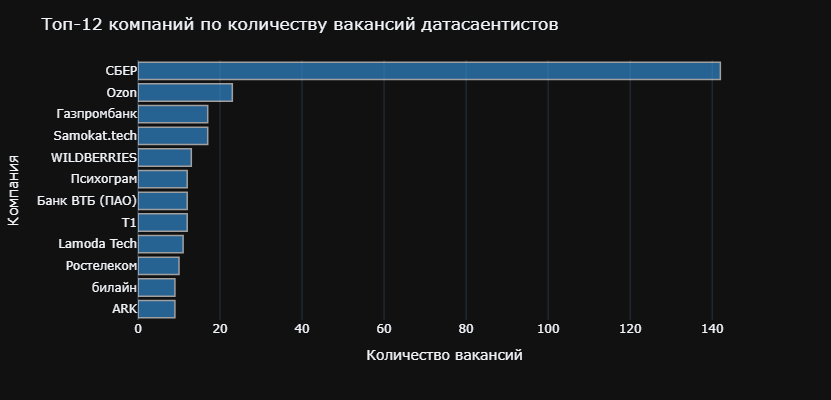

In [211]:
plot_discrete(
    'ds', 12, 'employer',
    rus_feature='Компания',
    title_text='Топ-12 компаний по количеству вакансий датасаентистов',
    color='#3498E8',
    height=400
)

На текущем рынке труда СБЕР выделяется как неоспоримый лидер по количеству предложений о работе. Интересно отметить, что в таких компаниях, как WILDBERRIES, ВТБ и МТС, наблюдается повышенный спрос на аналитиков данных по сравнению с датасаентистами. В то же время, в компаниях OZON, Газпромбанк и Samokat.tech, наоборот, профессия датасаентиста пользуется большей популярностью, чем аналитика данных. Это подчеркивает разнообразие потребностей в специалистах по обработке данных на рынке, где каждая компания стремится найти подходящего специалиста, отвечающего её уникальным требованиям.

---

Посмотрим как распределены вакансии по районам

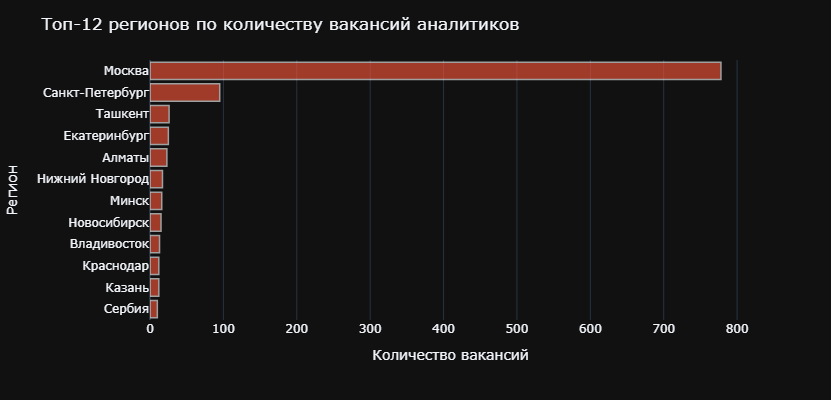

In [212]:
plot_discrete(
    'da', 12, 'area',
    rus_feature='Регион',
    title_text='Топ-12 регионов по количеству вакансий аналитиков',
    height=400
)

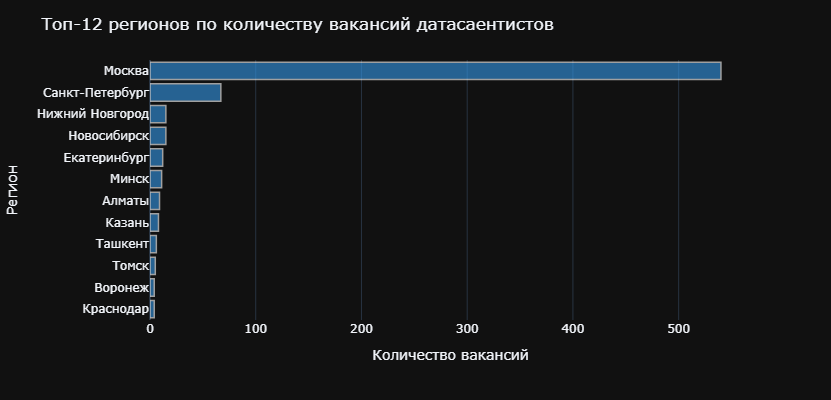

In [213]:
plot_discrete(
    'ds', 12, 'area',
    rus_feature='Регион',
    title_text='Топ-12 регионов по количеству вакансий датасаентистов',
    color='#3498E8',
    height=400
)

Москва и Санкт-Петербург неизменно занимают лидирующие позиции по объему предложений работы, подтверждая свой статус крупнейших трудовых центров. Отдельно стоит выделить ситуацию в Ташкенте, где количество вакансий для аналитиков данных превышает число предложений для датасаентистов в четыре раза, что является ярким свидетельством специфического спроса на рынке труда данного региона.

---

Посмотрим распределены вакансии по количеству требуемого опыта

Количество вакансий аналитиков - 1160


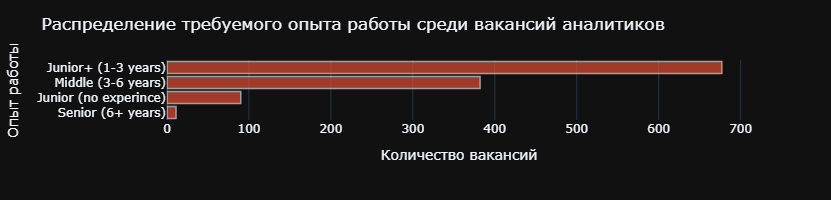

In [219]:
n_analyst = vacancies[vacancies.name_type == 'da'].shape[0]
print(f'Количество вакансий аналитиков - {n_analyst}')
plot_discrete(
    'da', 12, 'experience',
    rus_feature='Опыт работы',
    title_text='Распределение требуемого опыта работы среди вакансий аналитиков',
    height=200
)

Количество вакансий датасаентистов - 731


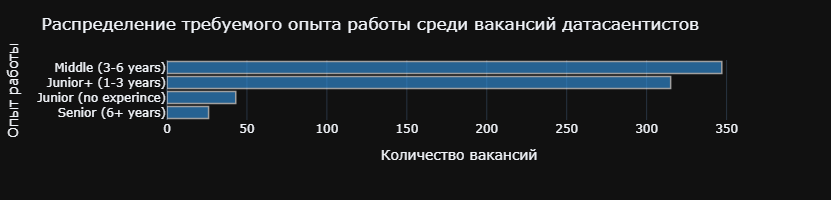

In [220]:
n_datascientist = vacancies[vacancies.name_type == 'ds'].shape[0]
print(f'Количество вакансий датасаентистов - {n_datascientist}')
plot_discrete(
    'ds', 12, 'experience',
    rus_feature='Опыт работы',
    title_text='Распределение требуемого опыта работы среди вакансий датасаентистов',
    color='#3498E8',
    height=200
)

Количество вакансий аналитиков